In [178]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import random 

Arquivos logjez baixados direto do TSE (https://dadosabertos.tse.jus.br/dataset/resultados-2022-arquivos-transmitidos-para-totalizacao) foram previamente convertidos com o script extracao_dados_eleicao_br disponível no github.
<p>O script processa cada arquivo de LOG nos ZIP's para gerar um CSV com os dados das urnas, incluindo municipio, zona, secao e modelo da urna
<P><code>for %f in (*.zip) do python3.10.exe extracao_dados_eleicao_br/main.py -z %f</code>
<p>Os arquivos são então carregados em uma matriz, e combinados na tabela <b>urnas</b>

In [180]:
path = "./DadosUrnas/bu_imgbu_logjez_rdv_vscmr_2022_2t_*.csv"
filenames = glob.glob(path)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding = "ISO-8859-1"))

urnas = pd.concat(dfs, ignore_index=True).dropna()

Vamos renomear algumas colunas para ficar de acordo com o padrão do arquivo de votos, que será carregado posteriormente. Assim fica mais facil fazer a correlação entre as duas tabelas

In [181]:
urnas = urnas.rename(columns = {
    'Diretório': 'pasta',
    'Arquivo': 'arquivo',
    'Município': 'municipio_cod',
    'Zona Eleitoral':'zona',
    'Local de Votação': 'local',
    'Seção Eleitoral':'secao',
    'Versão da aplicação':'versao',
    'Turno da UE':'turno',
    'Identificação do Modelo de Urna':'urna',
    'Fase da UE':'fase',
    'Serial de votação da MV':'serial_votacao'})

Aqui apresento uma amostra (linhas iniciais) da tabela de urnas:

In [189]:
urnas.sample(10)

pasta                      arquivo  \
265828  bu_imgbu_logjez_rdv_vscmr_2022_2t_PR  o00407-7859000220030.logjez   
122225  bu_imgbu_logjez_rdv_vscmr_2022_2t_MG  o00407-4001000960017.logjez   
83168   bu_imgbu_logjez_rdv_vscmr_2022_2t_ES  o00407-5621900440016.logjez   
385814  bu_imgbu_logjez_rdv_vscmr_2022_2t_SP  o00407-6401703410417.logjez   
466844  bu_imgbu_logjez_rdv_vscmr_2022_2t_SP  o00407-7245101470205.logjez   
78852   bu_imgbu_logjez_rdv_vscmr_2022_2t_DF  o00407-9701200130510.logjez   
181015  bu_imgbu_logjez_rdv_vscmr_2022_2t_MT  o00407-9047600060319.logjez   
8703    bu_imgbu_logjez_rdv_vscmr_2022_2t_AL  o00407-2893200340121.logjez   
438337  bu_imgbu_logjez_rdv_vscmr_2022_2t_SP  o00407-7107202550339.logjez   
136469  bu_imgbu_logjez_rdv_vscmr_2022_2t_MG  o00407-4267600710070.logjez   

        municipio_cod  zona   local  secao                   versao     turno  \
265828          78590    22  1040.0     30  8.26.0.0 - Onça-pintada  2º turno   
122225          40010    96  1155.0     17  8.26.0.0 - Onça-pintada  2º turno   
83168           56219    44  1040.0     16  8.26.0.0 - Onça-pintada  2º turno   
385814          64017   341  1996.0    417  8.26.0.0 - Onça-pintada  2º turno   
466844          72451   147  2097.0    205  8.26.0.0 - Onça-pintada  2º turno   
78852           97012    13  1341.0    510  8.26.0.0 - Onça-pintada  2º turno   
181015          90476     6     0.0    319  8.26.0.0 - Onça-pintada  2º turno   
8703            28932    34  1090.0    121  8.26.0.0 - Onça-pintada  2º turno   
438337          71072   255  1210.0    339  8.26.0.0 - Onça-pintada  2º turno   
136469          42676    71  1163.0     70  8.26.0.0 - Onça-pintada  2º turno   

          urna     fase serial_votacao  
265828  UE2010  Oficial       D06C7275  
122225  UE2010  Oficial       E79BF24E  
83168   UE2015  Oficial       791211E1  
385814  UE2020  Oficial       D0306BDE  
466844  UE2010  Oficial       0935C105  
78852   UE2010  Oficial       5CF87393  
181015  UE2009  Oficial       1A3D0BEE  
8703    UE2015  Oficial       F3BAFBB9  
438337  UE2015  Oficial       1CED1AF3  
136469  UE2009  Oficial       1F498AC8

Quantidade de urnas no banco de dados

In [190]:
urnas.size

5191659

A partir do nome da pasta (zip), vamos derivar o código do estado

In [191]:
urnas["UF"] = urnas["pasta"].str[-2:]

In [192]:
urnas.sample(10)

pasta                      arquivo  \
268378  bu_imgbu_logjez_rdv_vscmr_2022_2t_PR  o00407-7937500330170.logjez   
217214  bu_imgbu_logjez_rdv_vscmr_2022_2t_PE  o00407-2351500540070.logjez   
320616  bu_imgbu_logjez_rdv_vscmr_2022_2t_RS  o00407-8569300120242.logjez   
360685  bu_imgbu_logjez_rdv_vscmr_2022_2t_SE  o00407-3105400010177.logjez   
245245  bu_imgbu_logjez_rdv_vscmr_2022_2t_PR  o00407-7427600610255.logjez   
185584  bu_imgbu_logjez_rdv_vscmr_2022_2t_MT  o00407-9819100270002.logjez   
208636  bu_imgbu_logjez_rdv_vscmr_2022_2t_PB  o00407-2000100180108.logjez   
221406  bu_imgbu_logjez_rdv_vscmr_2022_2t_PE  o00407-2441400500007.logjez   
164598  bu_imgbu_logjez_rdv_vscmr_2022_2t_MG  o00407-5241802540212.logjez   
184591  bu_imgbu_logjez_rdv_vscmr_2022_2t_MT  o00407-9167700200523.logjez   

        municipio_cod  zona   local  secao                   versao     turno  \
268378          79375    33  1457.0    170  8.26.0.0 - Onça-pintada  2º turno   
217214          23515    54  1031.0     70  8.26.0.0 - Onça-pintada  2º turno   
320616          85693    12  1317.0    242  8.26.0.0 - Onça-pintada  2º turno   
360685          31054     1  1392.0    177  8.26.0.0 - Onça-pintada  2º turno   
245245          74276    61  1325.0    255  8.26.0.0 - Onça-pintada  2º turno   
185584          98191    27  1015.0      2  8.26.0.0 - Onça-pintada  2º turno   
208636          20001    18  1104.0    108  8.26.0.0 - Onça-pintada  2º turno   
221406          24414    50  1023.0      7  8.26.0.0 - Onça-pintada  2º turno   
164598          52418   254  1171.0    212  8.26.0.0 - Onça-pintada  2º turno   
184591          91677    20  1694.0    523  8.26.0.0 - Onça-pintada  2º turno   

          urna     fase serial_votacao  UF  
268378  UE2015  Oficial       4B59206B  PR  
217214  UE2015  Oficial       34867B82  PE  
320616  UE2009  Oficial       1889C0CE  RS  
360685  UE2020  Oficial       85F32E37  SE  
245245  UE2015  Oficial       A53D5A30  PR  
185584  UE2009  Oficial       AAEAB93A  MT  
208636  UE2015  Oficial       6E080C3E  PB  
221406  UE2010  Oficial       989862C7  PE  
164598  UE2010  Oficial       9381F139  MG  
184591  UE2020  Oficial       32462155  MT

Aqui carregamos os arquivo com os votos.
<p>Os arquivos de boletim de urna foram baixados usando o script download.php, e depois convertidos em CSV com o bu_dump.py (ambos disponiveis na pasta DownloadBU)

In [193]:
path = "./csv/mun/*-mun.csv"
filenames = glob.glob(path)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding = "ISO-8859-1"))

votos = pd.concat(dfs, ignore_index=True).dropna().astype({'municipio_cod':'int', 'zona': 'int', 'secao': 'int'})

In [194]:
votos.size

3296692

In [206]:
votos.sample(10)

estado                        municipio  municipio_cod  zona  secao  \
178729     ms                        BODOQUENA          98019    15     82   
12026      am                           MANAUS           2550    40    342   
71248      ce                         SABOEIRO          15393    43    283   
17299      ap                           CUTIAS           6068    10    296   
74873      ce                           MILHÃ          15970    55    109   
434653     sp                       SÃO PAULO          71072   247    171   
190319     pa                           BELÃM           4278     1     33   
112433     ma  SÃO LUÃS GONZAGA DO MARANHÃO           8052    35     14   
199381     pa                   NOVA TIMBOTEUA           4995    33     18   
372844     sp                          BARUERI          62138   199    371   

        candidato_13  candidato_22  
178729          88.0          87.0  
12026          163.0          80.0  
71248          135.0          14.0  
17299           90.0          78.0  
74873          195.0          38.0  
434653         116.0          86.0  
190319         176.0         210.0  
112433         173.0          35.0  
199381         194.0          52.0  
372844         163.0         151.0

Aqui vamos consolidar as tabelas de votos e de urnas para complementar os dados correlacionados.
<p>Os dados são combinados e saneados para evitar duplicidades

In [207]:
votosConsolidados = votos.set_index(['municipio_cod','zona','secao']).join(urnas.set_index(['municipio_cod','zona','secao']),validate="1:m",how='inner').dropna()

In [208]:
votosConsolidados = votosConsolidados[['UF','municipio','candidato_13','candidato_22','urna']].sort_index().drop_duplicates()

In [209]:
votosConsolidados.size

2224295

In [226]:
votosConsolidados.sample(20)

UF               municipio  candidato_13  \
municipio_cod zona secao                                             
74934         68   100    PR                CASCAVEL          77.0   
70750         174  225    SP  SÃO BERNARDO DO CAMPO          99.0   
84980         38   165    RS          PANTANO GRANDE         192.0   
310           17   23     RO   ALTA FLORESTA D'OESTE          40.0   
97012         15   184    DF               BRASÃLIA          87.0   
71072         405  280    SP              SÃO PAULO         185.0   
13897         93   72     CE               FORTALEZA         225.0   
88013         111  121    RS            PORTO ALEGRE         107.0   
60011         238  188    RJ          RIO DE JANEIRO         120.0   
14354         72   1      CE             JAGUARETAMA         142.0   
90670         39   521    MT                 CUIABÃ          94.0   
97012         4    360    DF               BRASÃLIA         102.0   
1490          2    5      AC                  XAPURI          64.0   
88412         135  288    RS             SANTA MARIA          59.0   
90662         31   113    MT   RIBEIRÃO CASCALHEIRA          51.0   
90131         49   123    MS              ANASTÃCIO         163.0   
8710          87   226    MA                 PIO XII         151.0   
41238         29   287    MG          BELO HORIZONTE         162.0   
71072         258  261    SP              SÃO PAULO         125.0   
12572         91   29     PI       CAJUEIRO DA PRAIA         204.0   

                          candidato_22    urna  
municipio_cod zona secao                        
74934         68   100           193.0  UE2015  
70750         174  225           116.0  UE2020  
84980         38   165            78.0  UE2010  
310           17   23            142.0  UE2013  
97012         15   184           146.0  UE2020  
71072         405  280           123.0  UE2009  
13897         93   72            180.0  UE2020  
88013         111  121           175.0  UE2020  
60011         238  188           229.0  UE2020  
14354         72   1              31.0  UE2010  
90670         39   521           177.0  UE2020  
97012         4    360           224.0  UE2013  
1490          2    5             110.0  UE2009  
88412         135  288           144.0  UE2020  
90662         31   113           135.0  UE2009  
90131         49   123            67.0  UE2010  
8710          87   226            57.0  UE2011  
41238         29   287           180.0  UE2020  
71072         258  261           138.0  UE2020  
12572         91   29             51.0  UE2009

Os dados não necessariamente contem todas as seções, mas para uma análise de comportamento das urnas é necessário ter uma boa representação por estado, conforme a distribuição exibida abaixo

Text(0.5, 1.0, 'Tipo de Urna Por Estado')

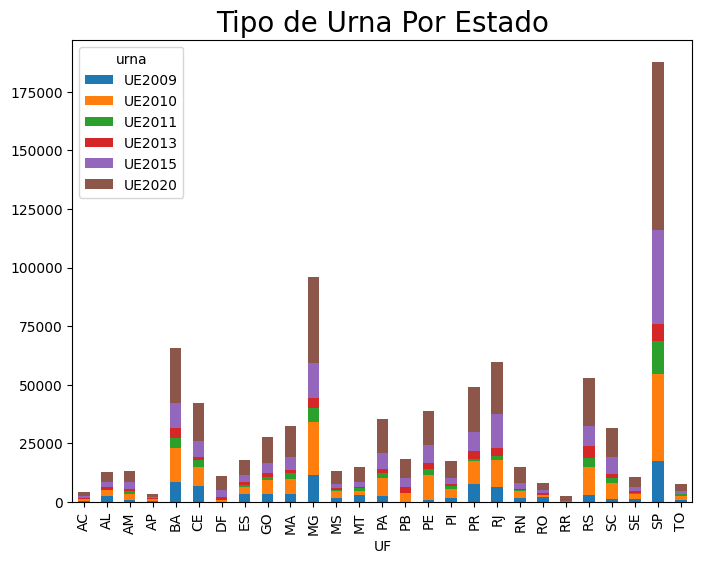

In [227]:
urnasPorUF = pd.pivot_table(data=votosConsolidados[['UF','urna']], index=['UF'], columns=['urna'], aggfunc=np.count_nonzero)
ax = urnasPorUF.plot.bar(stacked=True, figsize=(8,6))
ax.set_title('Tipo de Urna Por Estado', fontsize=20)

Os graficos abaixo mostram a distribuição de votos apurados nas urnas UE2020 e o contraste para as não UE2020 (anteriores a 2020 que não foram auditadas no pleito de 2022)

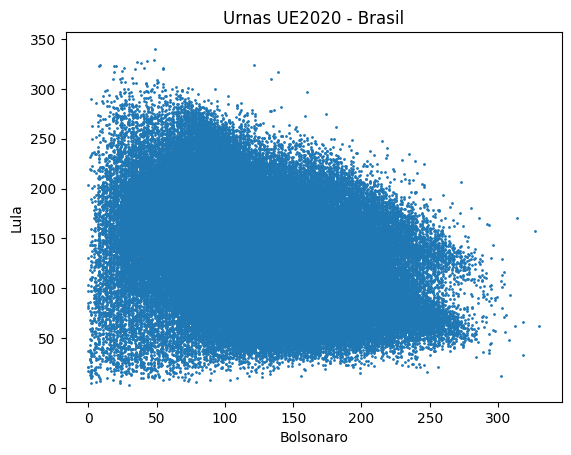

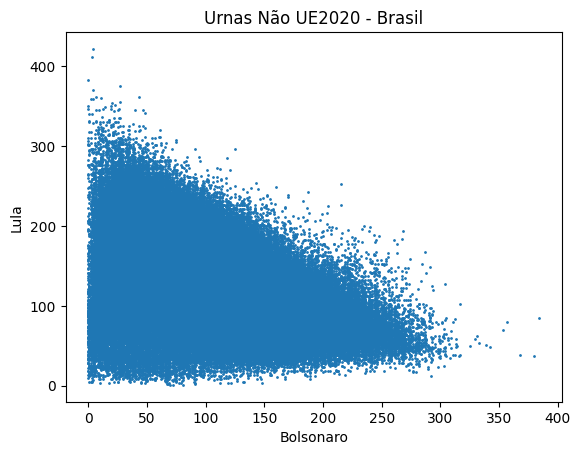

In [228]:
data = votosConsolidados.query("urna == 'UE2020'")
plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
plt.title("Urnas UE2020 - Brasil")
plt.xlabel("Bolsonaro")
plt.ylabel("Lula")
plt.show()

data = votosConsolidados.query("urna != 'UE2020'")
plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
plt.title("Urnas Não UE2020 - Brasil")
plt.xlabel("Bolsonaro")
plt.ylabel("Lula")
plt.show()

Aqui os mesmos dados para as urnas por UF

RO


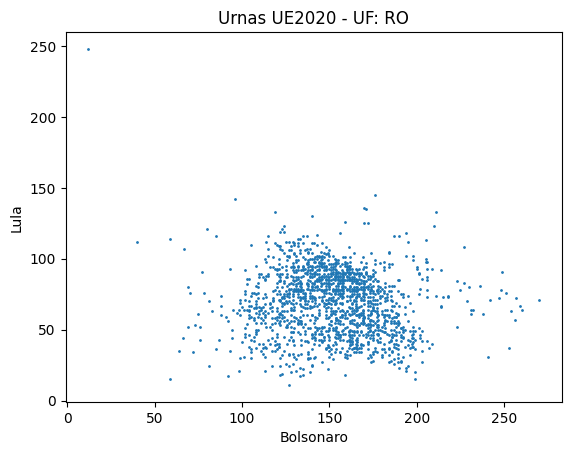

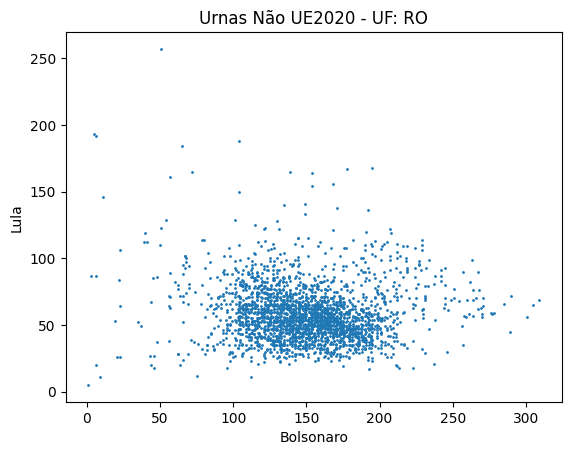

AC


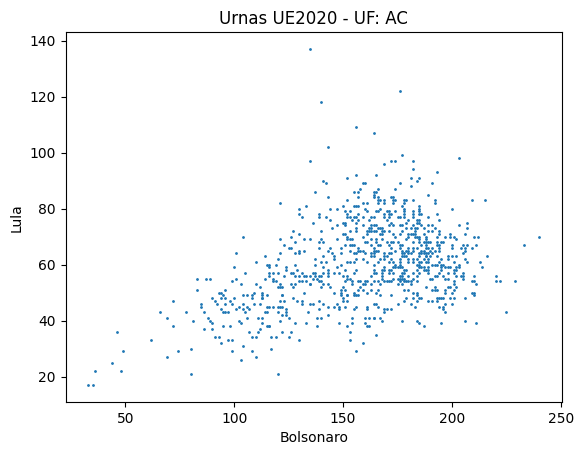

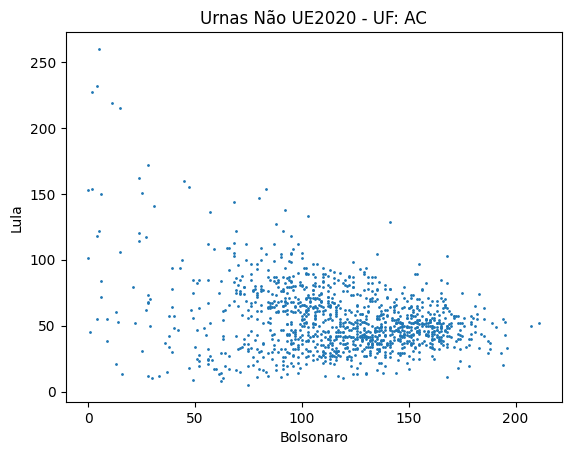

AM


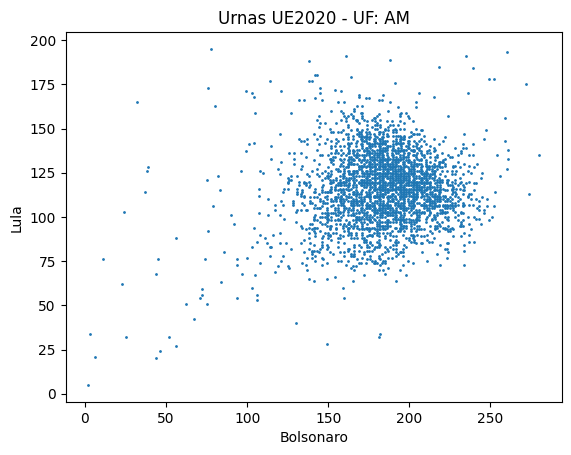

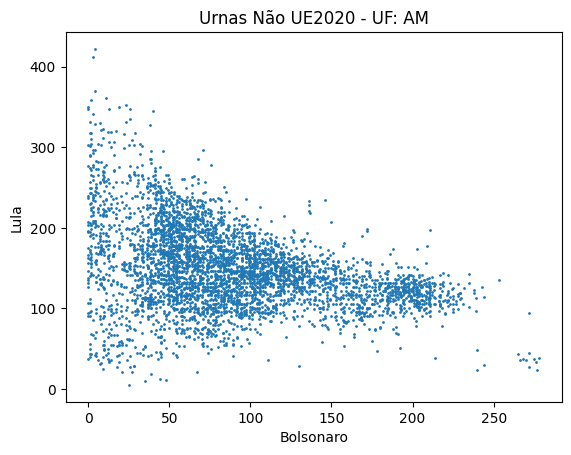

RR


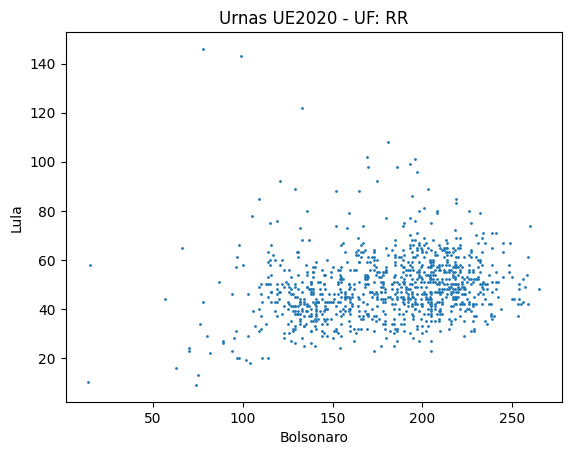

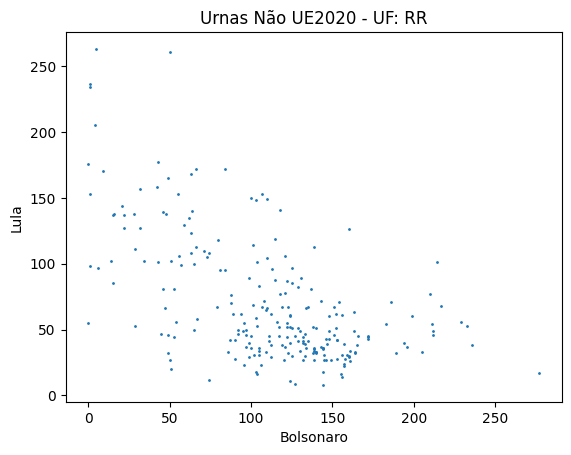

PA


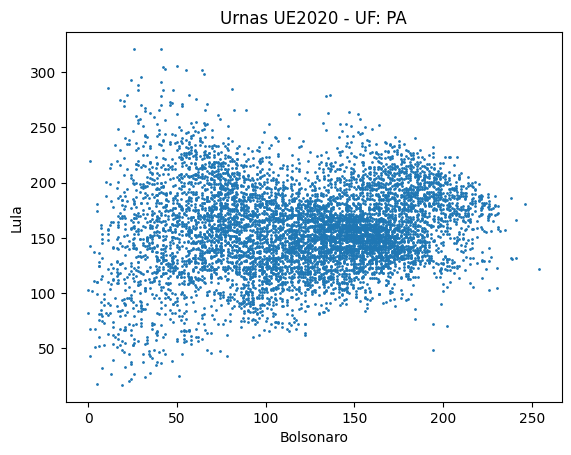

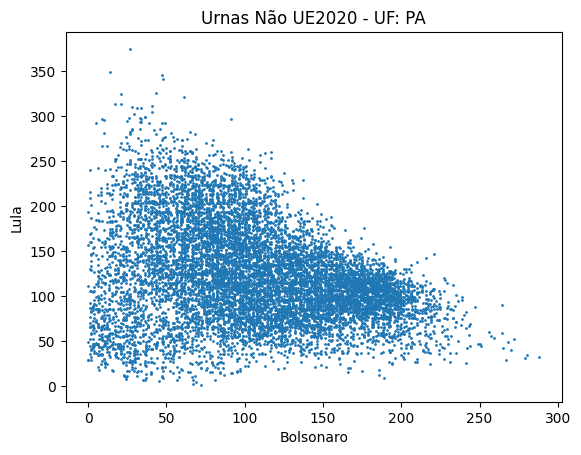

AP


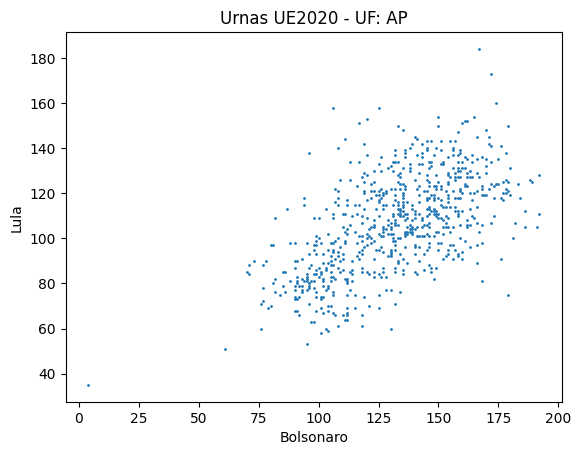

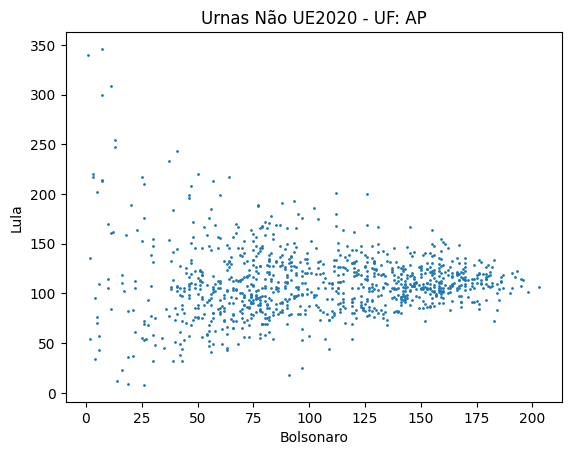

MA


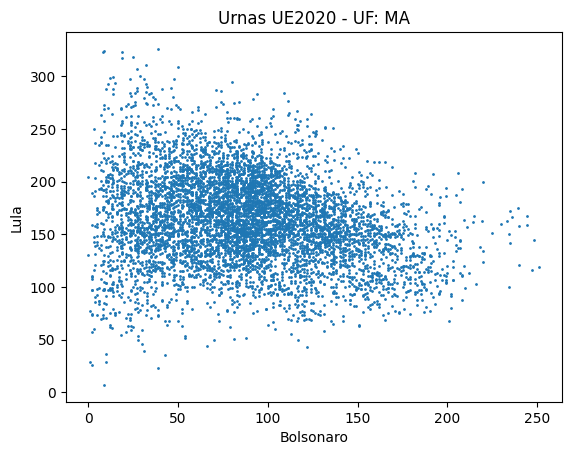

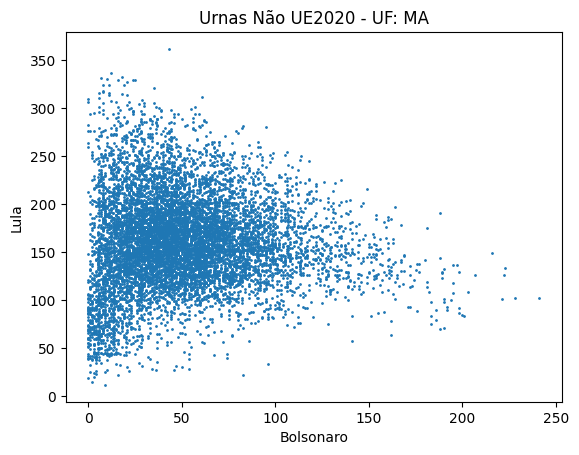

PI


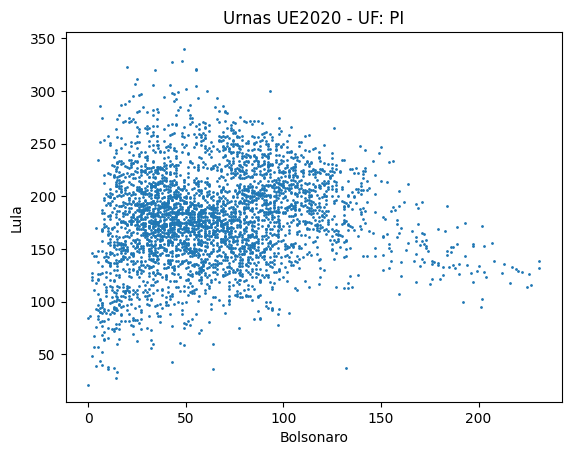

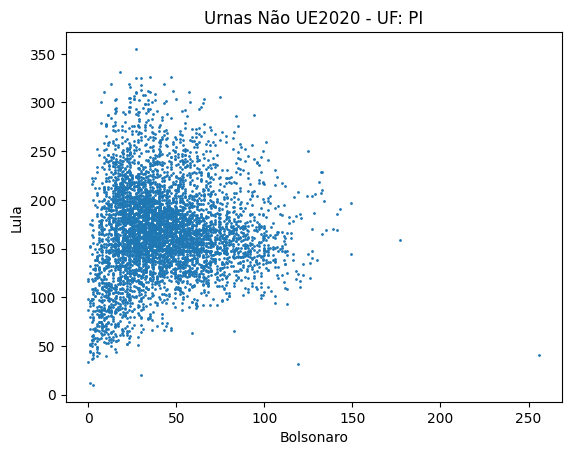

CE


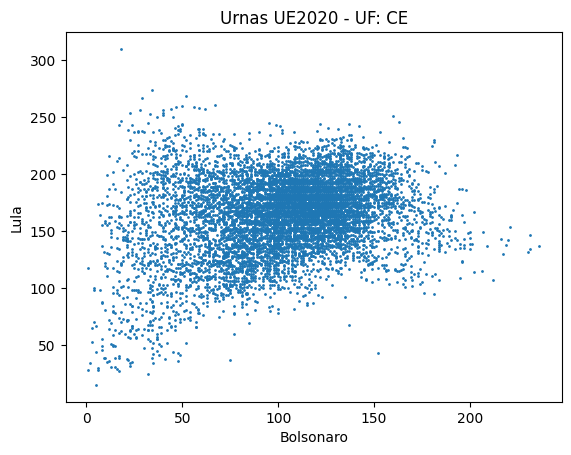

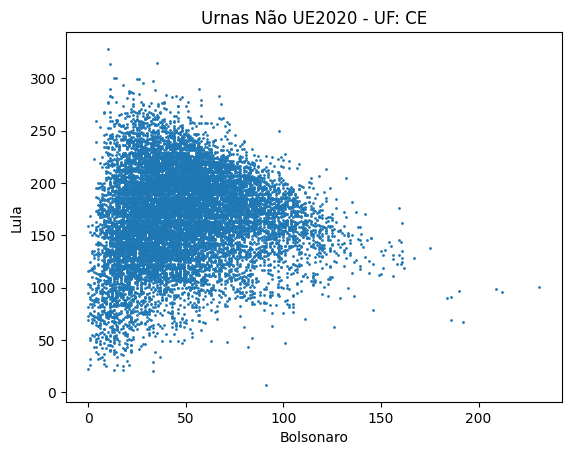

RN


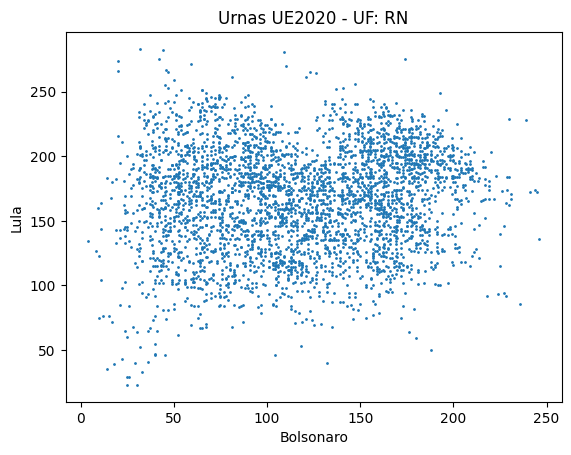

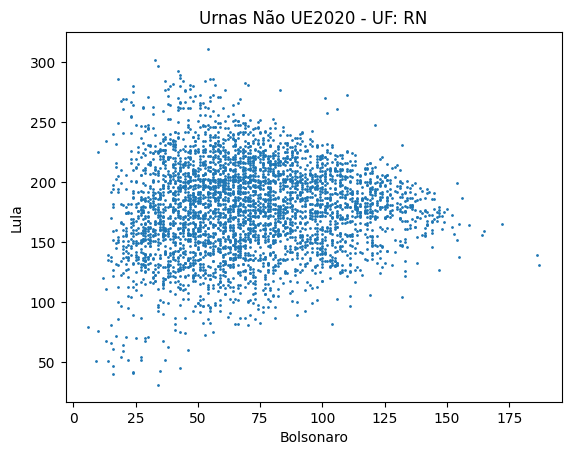

PB


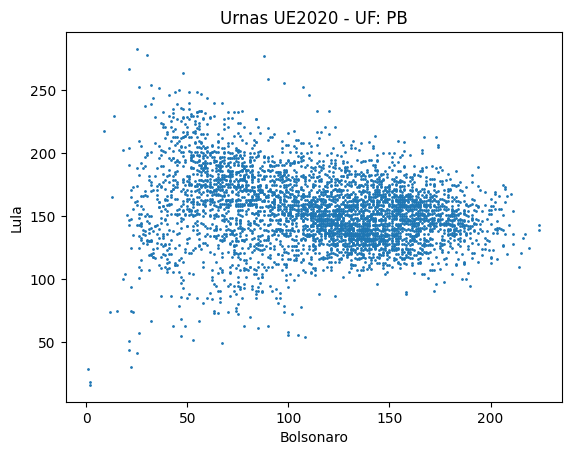

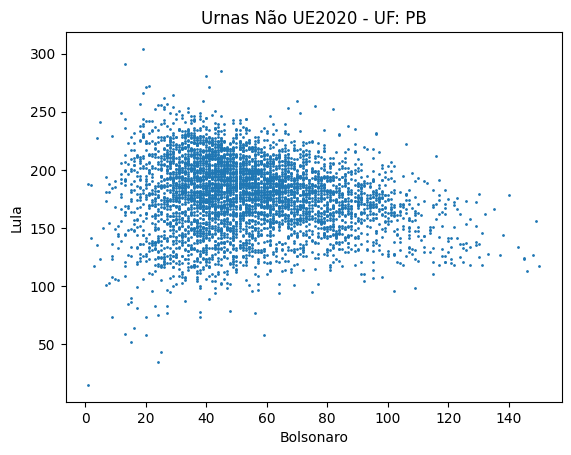

PE


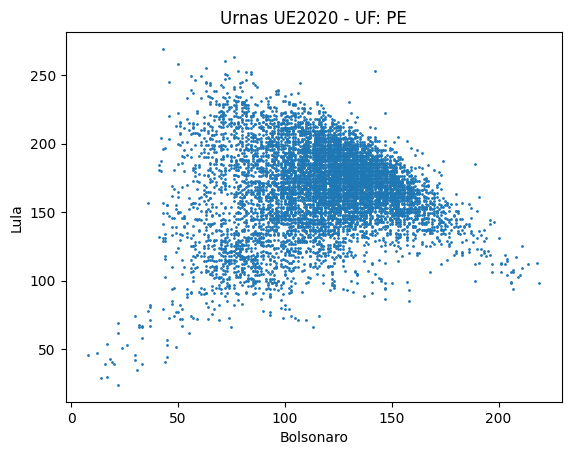

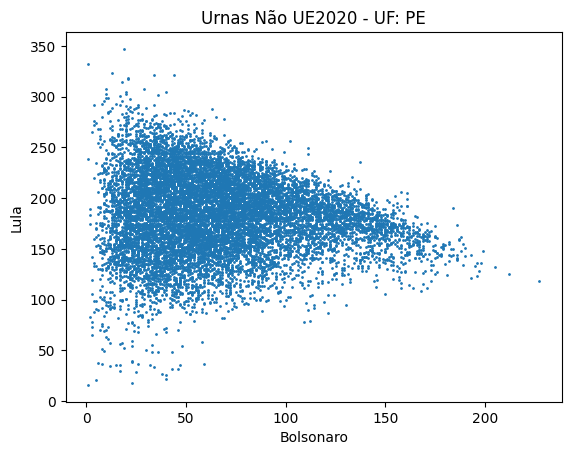

AL


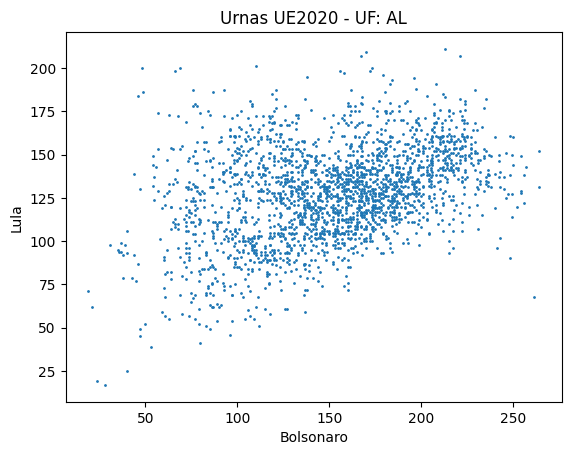

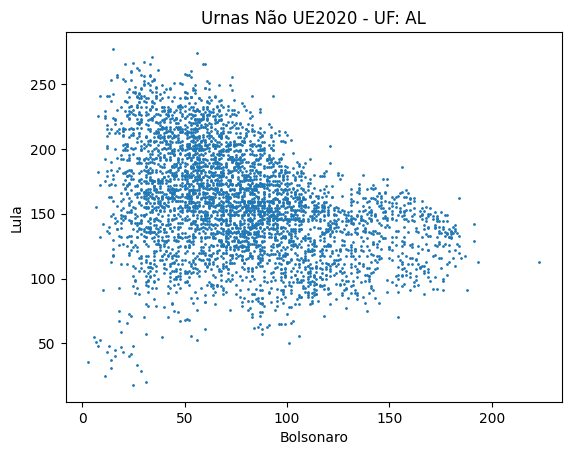

BA


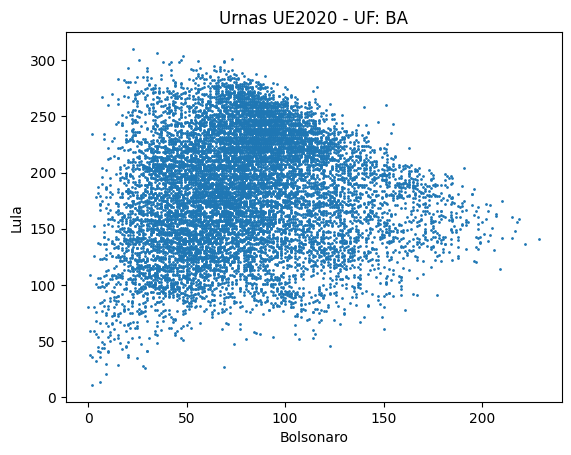

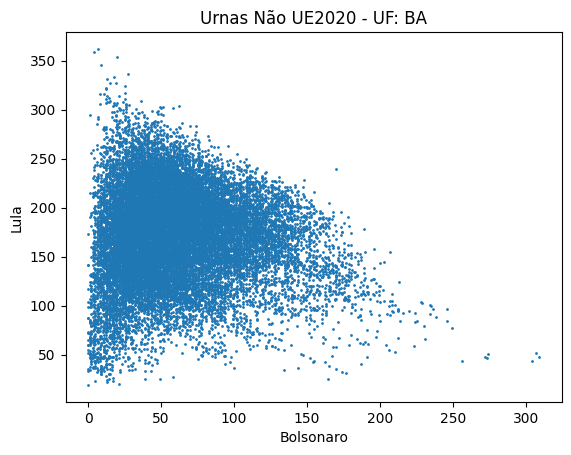

SE


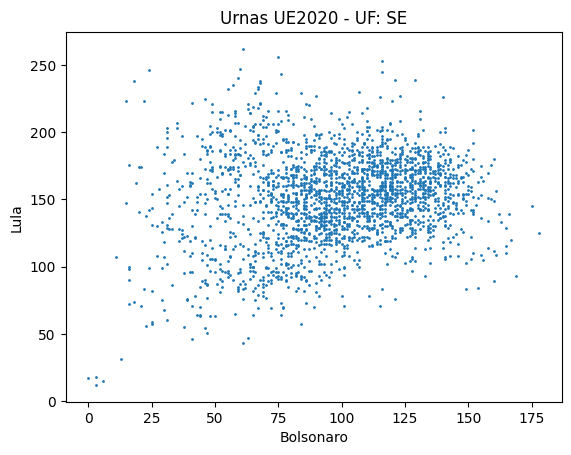

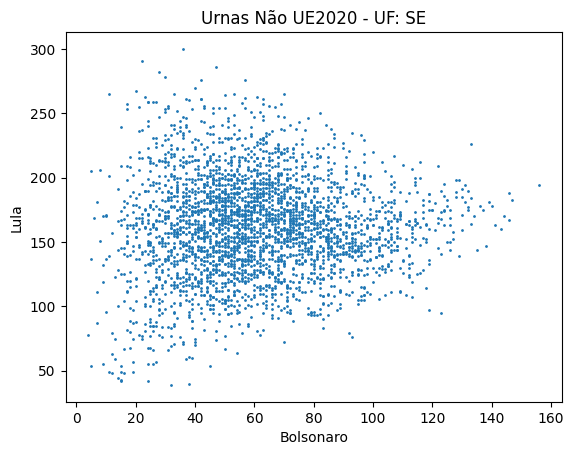

MG


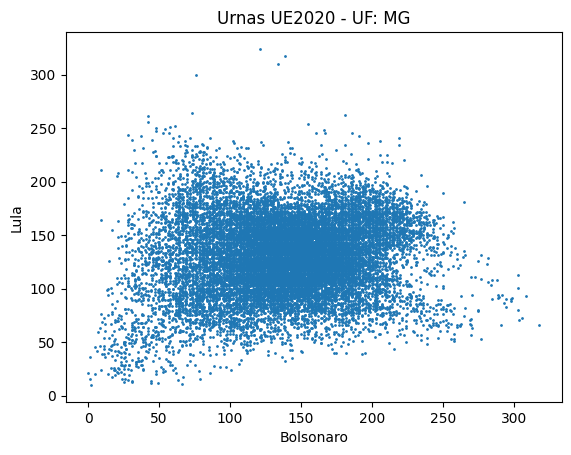

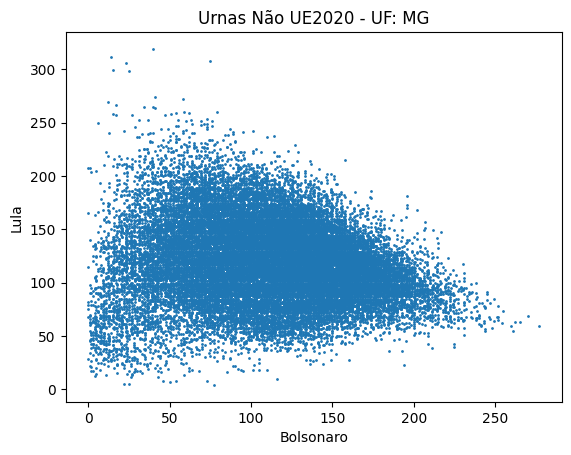

MS


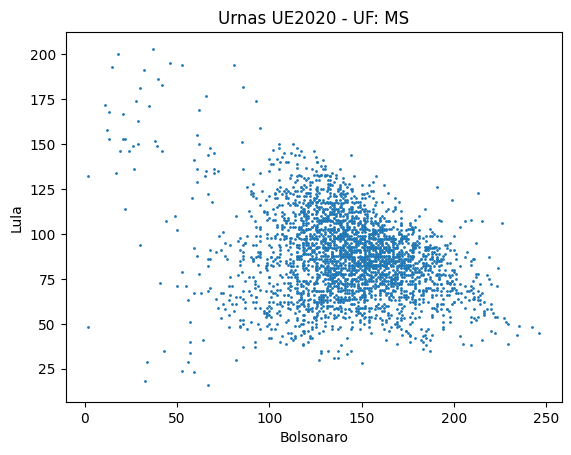

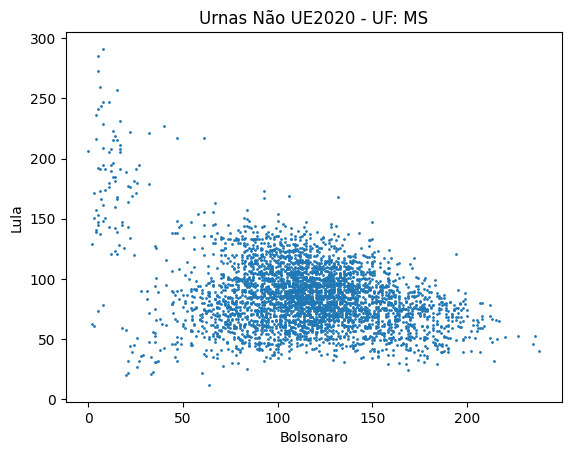

ES


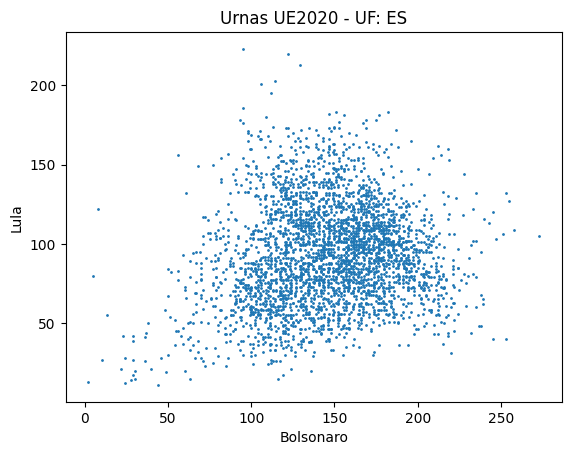

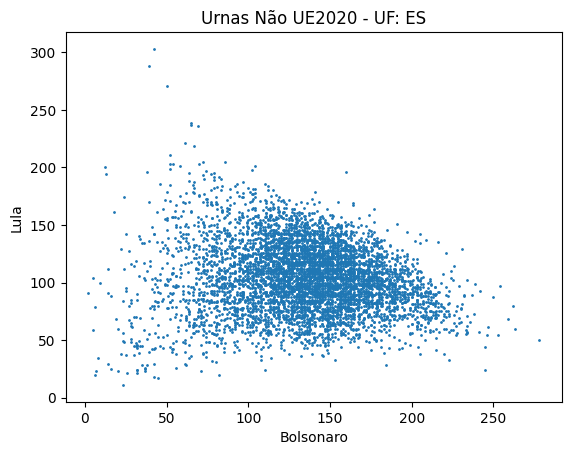

RJ


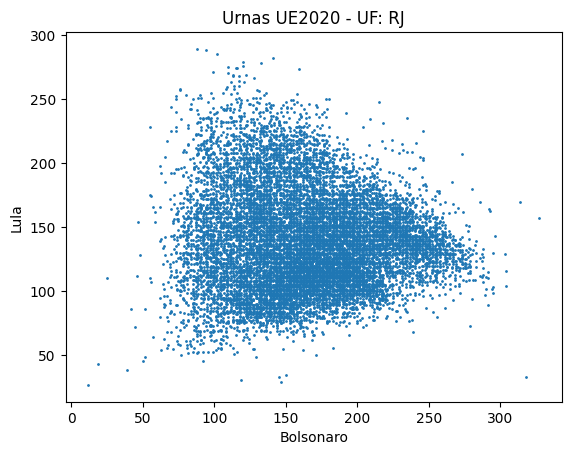

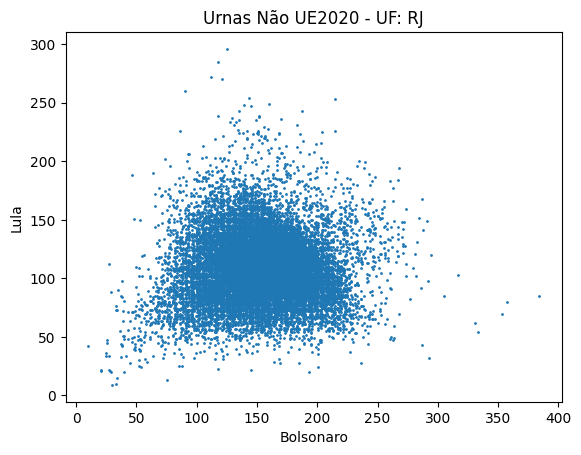

SP


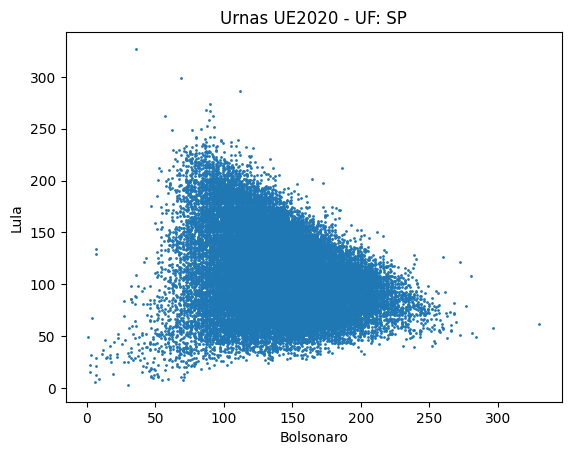

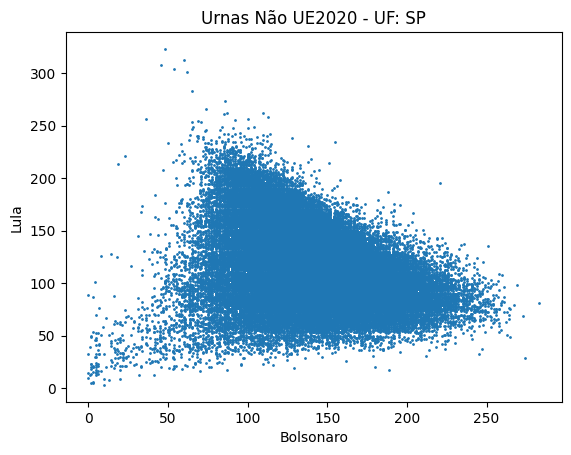

TO


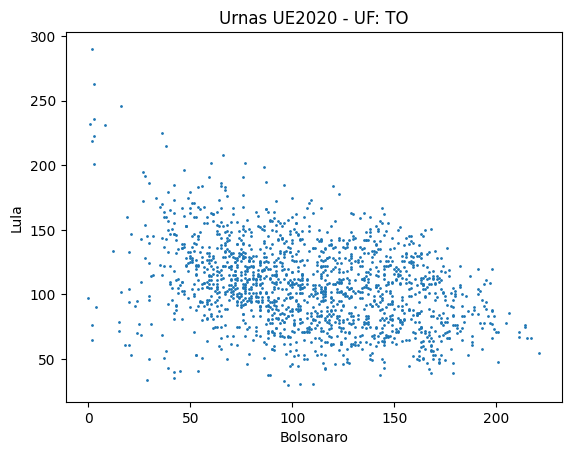

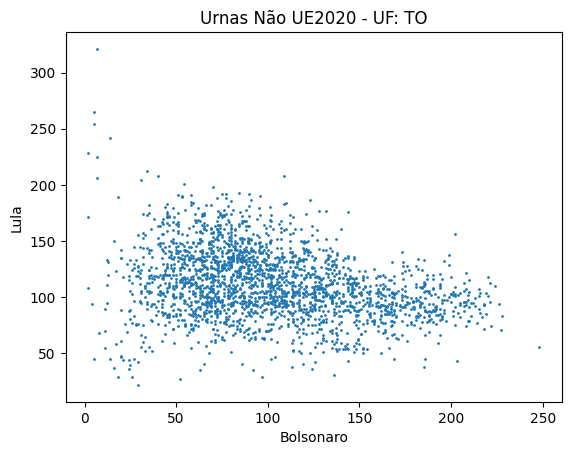

PR


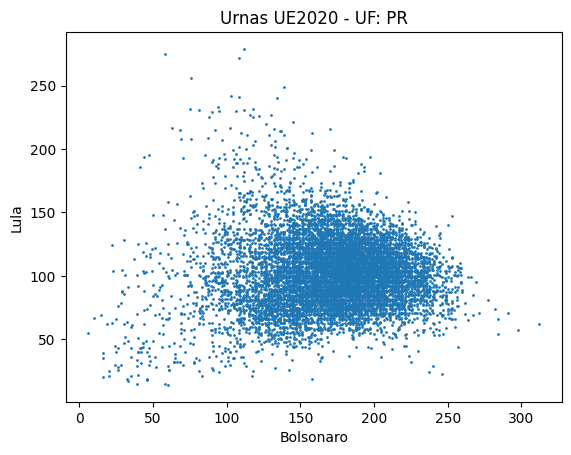

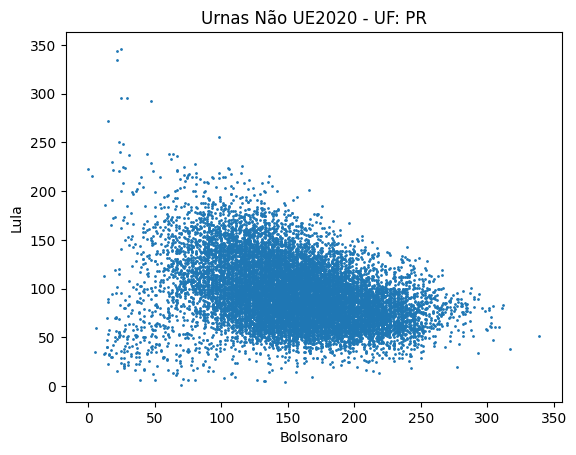

SC


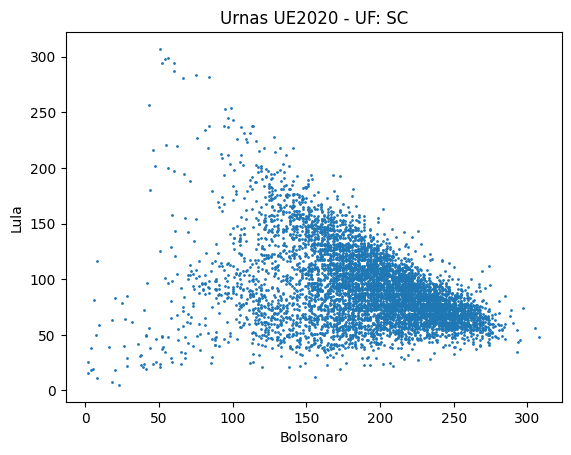

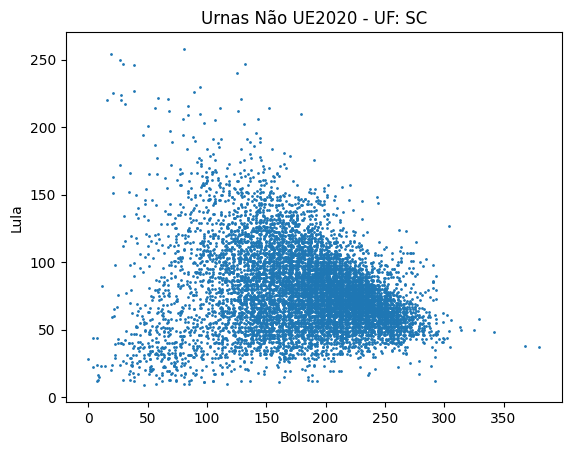

RS


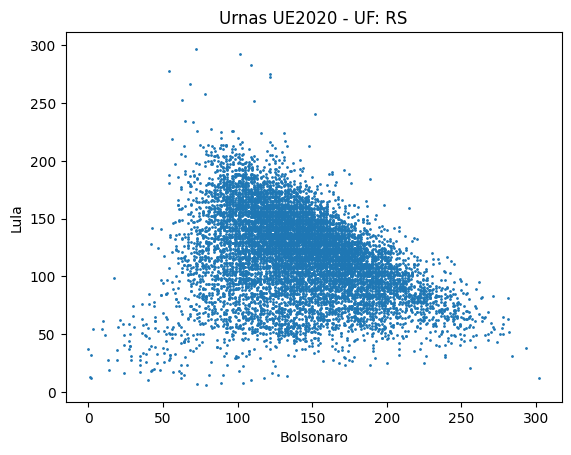

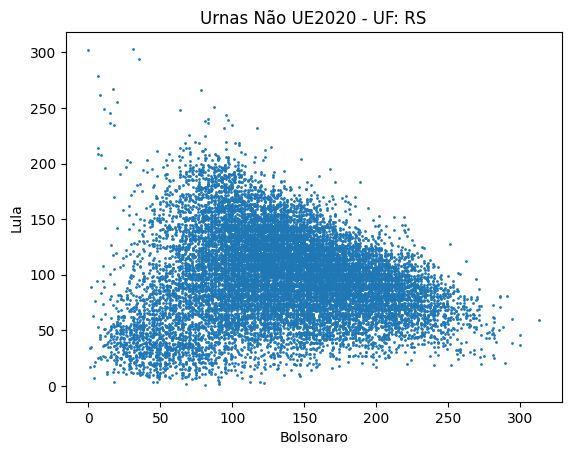

MT


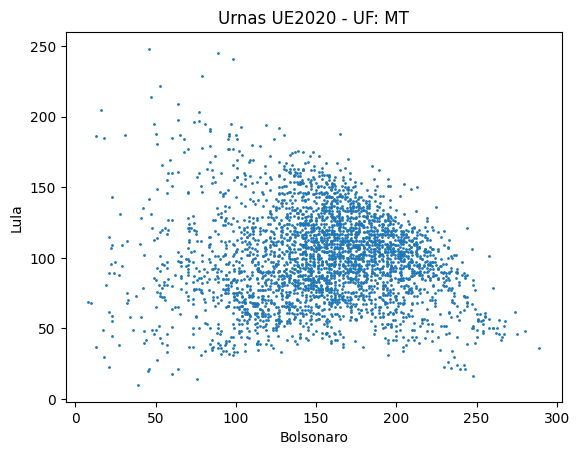

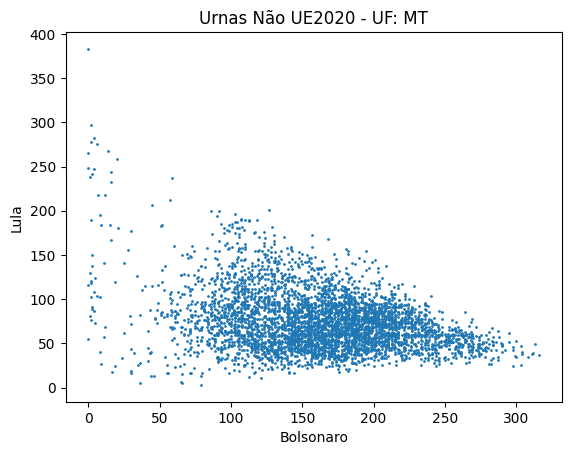

GO


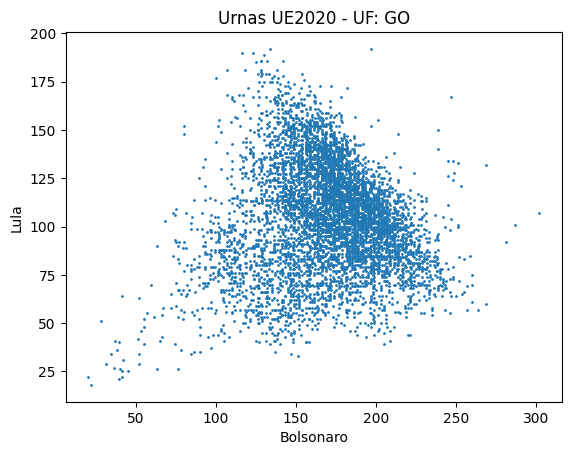

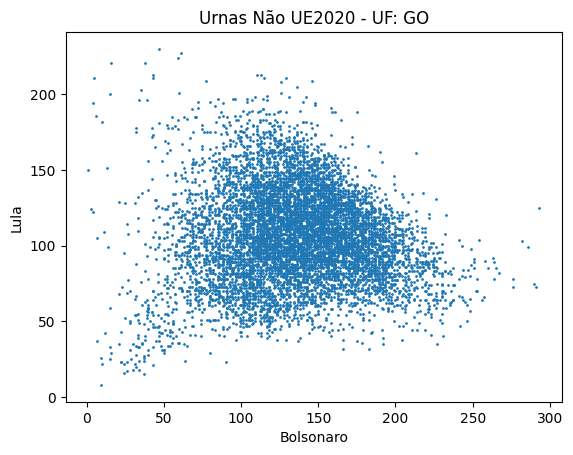

DF


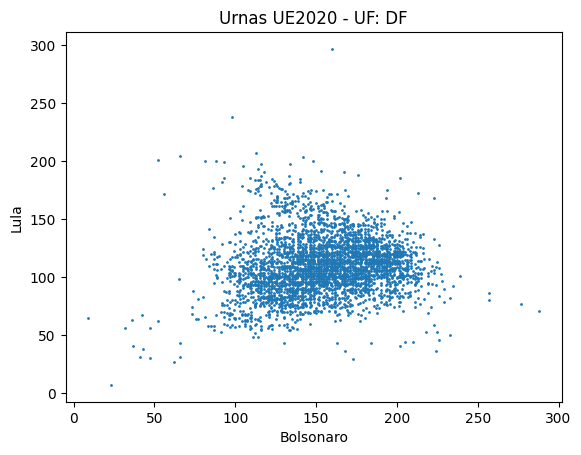

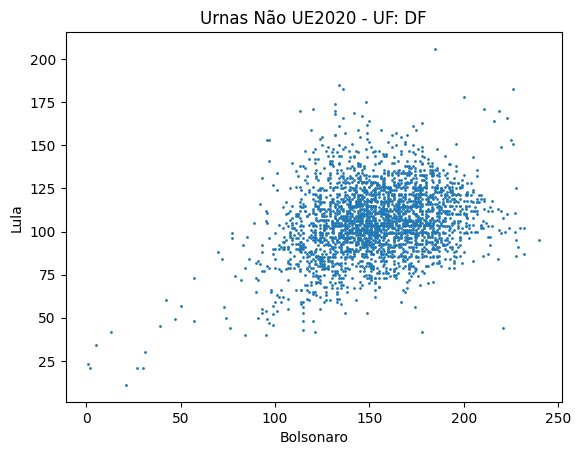

In [229]:
for index, row in votosConsolidados.filter(['UF'], axis=1).drop_duplicates().iterrows():
    print(row['UF'])
    data = votosConsolidados.query("urna == 'UE2020' and UF == '"+row['UF']+"'")
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas UE2020 - UF: "+row['UF'])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

    data = votosConsolidados.query("urna != 'UE2020' and UF == '"+row['UF']+"'")
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas Não UE2020 - UF: "+row['UF'])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

Aqui outro exercício com urnas aleatórias

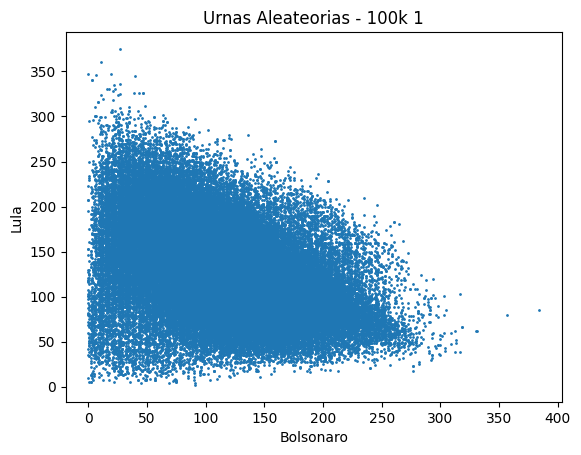

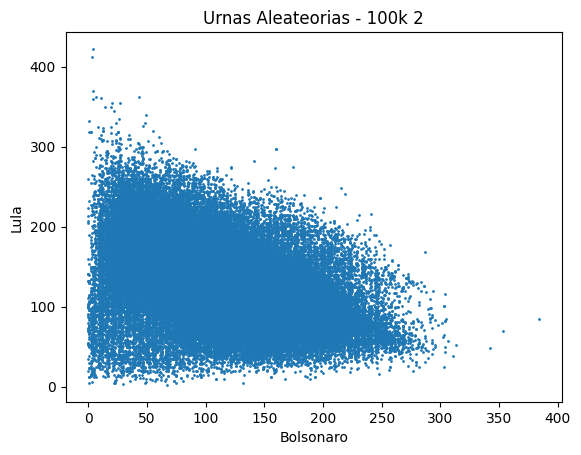

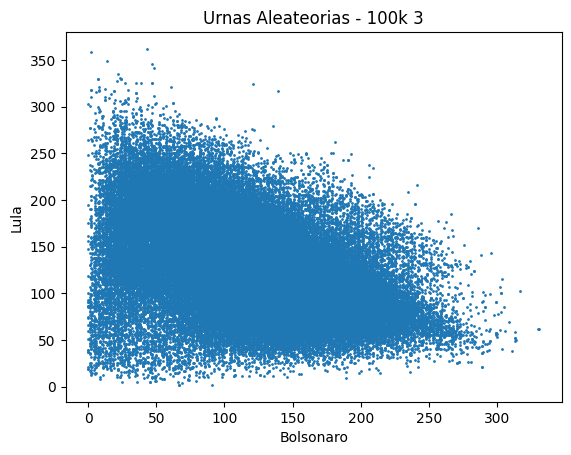

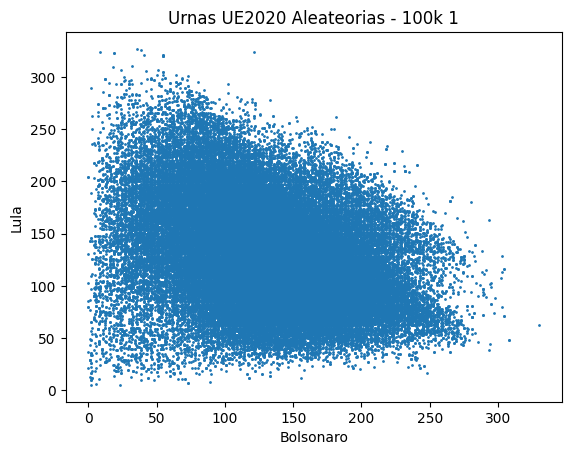

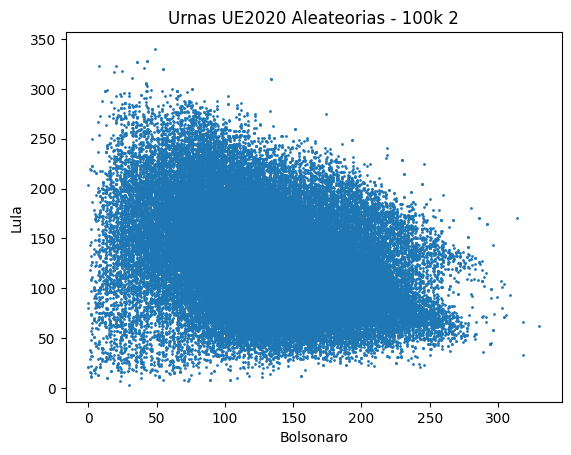

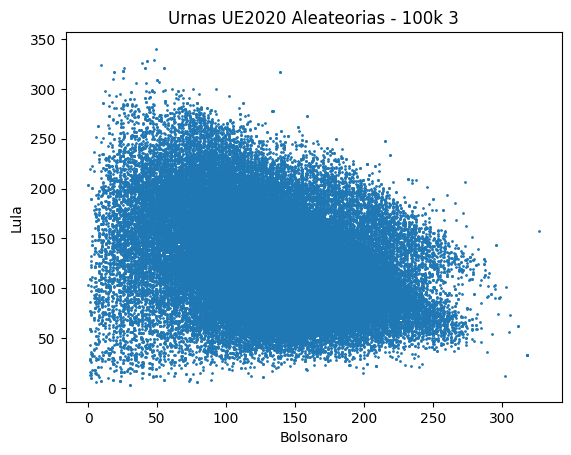

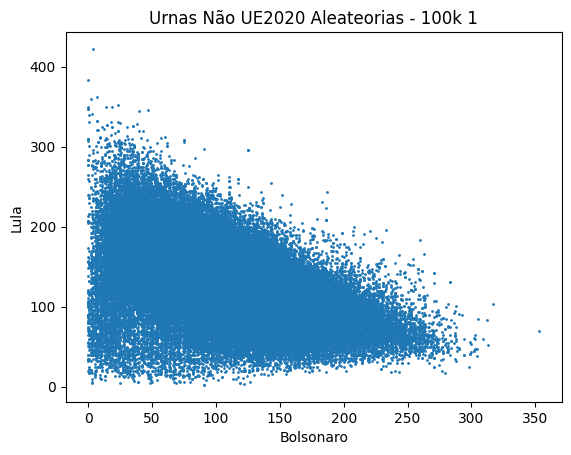

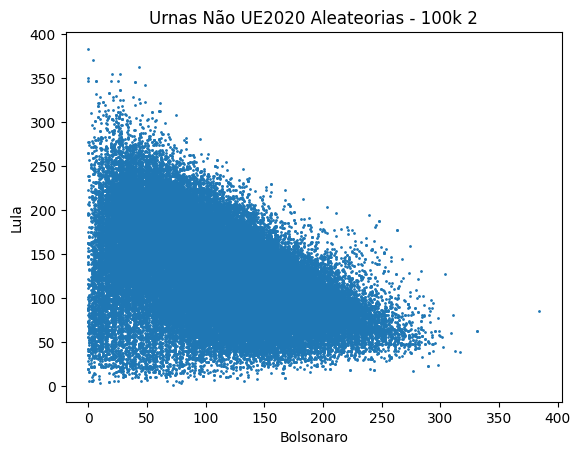

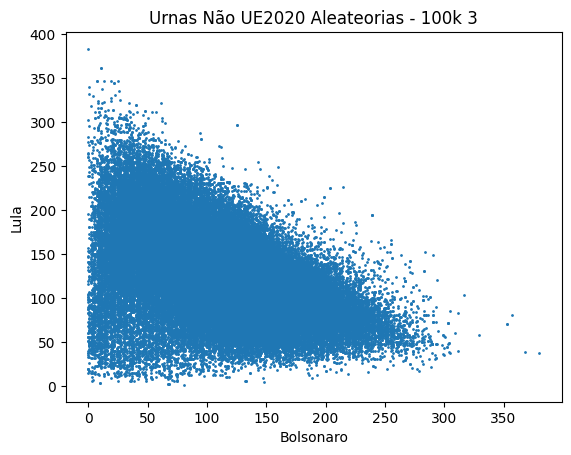

In [230]:
for i in range(3): 
    data = votosConsolidados.sample(n=100000, random_state=random.randint(1,10000), replace=True)
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas Aleateorias - 100k " + str(i+1))
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()


for i in range(3): 
    data = votosConsolidados.query("urna == 'UE2020'").sample(n=100000, random_state=random.randint(1,10000), replace=True)
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas UE2020 Aleateorias - 100k " + str(i+1))
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()
    
for i in range(3): 
    data = votosConsolidados.query("urna != 'UE2020'").sample(n=100000, random_state=random.randint(1,10000), replace=True)
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas Não UE2020 Aleateorias - 100k " + str(i+1))
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

Resultados

C:\Users\coelh\AppData\Local\Temp\ipykernel_18584\3748645400.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  votosConsolidados.groupby(['UF']).sum().plot.bar(color=['red','blue']).set_title("Votos Geral")
C:\Users\coelh\AppData\Local\Temp\ipykernel_18584\3748645400.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  votosConsolidados.query("urna == 'UE2020'").groupby(['UF']).sum().plot.bar(color=['red','blue']).set_title("Votos UE2020")
C:\Users\coelh\AppData\Local\Temp\ipykernel_18584\3748645400.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future vers

Text(0.5, 1.0, 'Votos Não UE2020')

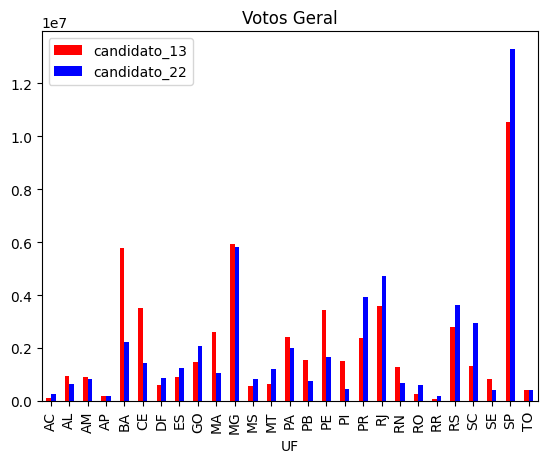

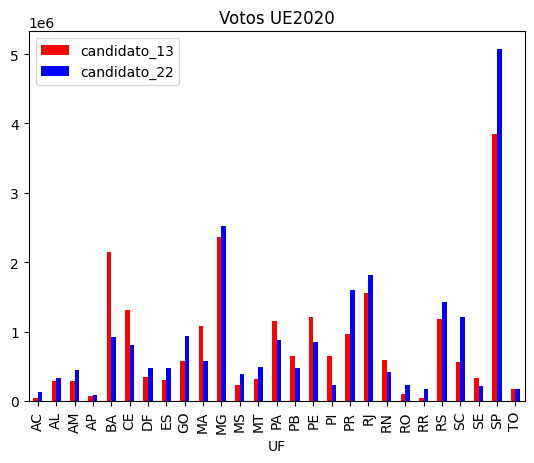

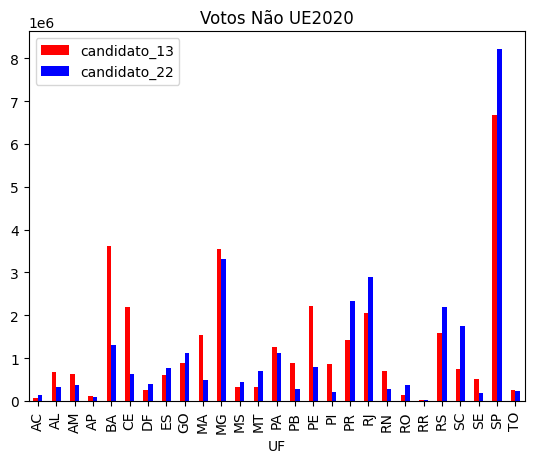

In [231]:
votosConsolidados.groupby(['UF']).sum().plot.bar(color=['red','blue']).set_title("Votos Geral")
votosConsolidados.query("urna == 'UE2020'").groupby(['UF']).sum().plot.bar(color=['red','blue']).set_title("Votos UE2020")
votosConsolidados.query("urna != 'UE2020'").groupby(['UF']).sum().plot.bar(color=['red','blue']).set_title("Votos Não UE2020")

C:\Users\coelh\AppData\Local\Temp\ipykernel_18584\406436284.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  votosConsolidados.groupby(['urna']).sum().plot.bar(color=['red','blue']).set_title("Votos por Tipo de Urna")


Text(0.5, 1.0, 'Votos por Tipo de Urna')

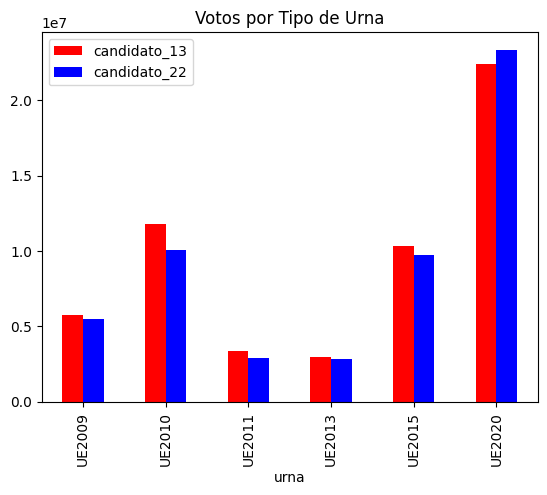

In [232]:
votosConsolidados.groupby(['urna']).sum().plot.bar(color=['red','blue']).set_title("Votos por Tipo de Urna")